# Text Classification-->tfid vectorizer?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC #algo

In [8]:
df=pd.read_csv("G:\\Machine Learning\\hamspam.tsv",delimiter="\t")
#df=pd.read_csv("G:\Machine Learning\email\emails.csv")

In [9]:
df.columns=["label","email"]

In [10]:
df.head()

,label,email
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [11]:
df["target"]=df.label.apply(lambda x:1 if x=="ham" else 0)

In [12]:
df.head()

,label,email,target
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
1,ham,"Nah I don't think he goes to usf, he lives aro...",1
2,ham,Even my brother is not like to speak with me. ...,1
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,1


In [13]:
x=df.label.value_counts()
y=df.target.value_counts()
x

ham     4821
spam     746
Name: label, dtype: int64

<Container object of 2 artists>

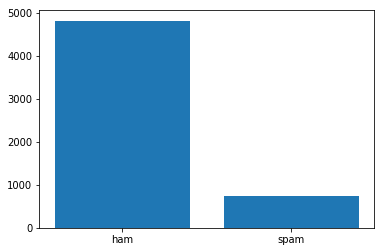

In [14]:
plt.bar(x.index,x.values)# the difference should not be high in general

In [15]:
# converting string emal to numbers

In [16]:
x_train=df.email.values

In [17]:


y_train=df.target.values
len(x_train)

5567

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vec=CountVectorizer(stop_words='english')

In [20]:
#ex:
#vec.fit(["Hi I am Robot","hello this is dog","how do you do","Where r u"])

In [21]:
#vec.transform(["hi,I am greedy"]).toarray() #converted to numeric data

In [22]:
#vec.get_feature_names()

# conversion of text to numeric data

In [23]:
vec.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
len(vec.get_feature_names())

8438

In [25]:
data=vec.transform(["hi,u won lottery"]).toarray()
data

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
data.shape

(1, 8438)

In [27]:
nx_train=vec.transform(x_train)

In [28]:
nx_train.shape

(5567, 8438)

In [29]:
model=SVC()

In [30]:
model.fit(nx_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
model1=DecisionTreeClassifier()

In [32]:
model1.fit(nx_train,y_train)
model1.predict(vec.transform(["Eko's objective is to hire the next set of tech geeks as Java Full Stack Developer. Eko India Financial Services Pvt Ltd is looking to fill 4 positions in Gurgaon and is also giving a chance to win prizes worth Rs. 12,000."]).toarray()) #need more data to predict better

array([0], dtype=int64)

2,Ham Span different data set

In [33]:
df=pd.read_csv("G:\Machine Learning\email\emails.csv")

In [39]:
df=df.iloc[:,0:2]

In [43]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [56]:
y=df.spam.value_counts()
y

0                                                                                               4358
1                                                                                               1368
 mr suresh prabhu                                                                                  1
 its termination would not  have such a phenomenal impact on the power situation .  however        1
Name: spam, dtype: int64

<Container object of 4 artists>

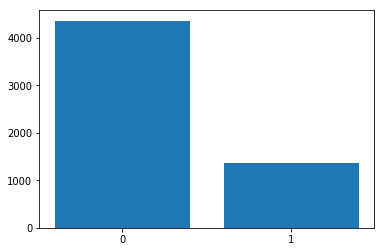

In [55]:
plt.bar(y.index,y.values)

In [59]:
x_train=df.text.values
y_train=df.spam.values

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
vec=CountVectorizer()

In [62]:
vec.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)